# 2. Preprocess Candidate Tweets

In [1]:
import tweepy, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime as dt

%run tweet_processing_funcs.py
%matplotlib inline

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Open all Candidate Tweets

In [2]:
open_file = open('pickle_files/McAuliffe_tweets.pkl', "rb")
all_tweets_mcauliffe = pickle.load(open_file)
open_file.close()

In [3]:
open_file = open('pickle_files/Youngkin_tweets.pkl', "rb")
all_tweets_youngkin = pickle.load(open_file)
open_file.close()

In [4]:
open_file = open('pickle_files/MurphyNJ_tweets.pkl', "rb")
all_tweets_murphy = pickle.load(open_file)
open_file.close()

In [5]:
open_file = open('pickle_files/CiattarelliNJ_tweets.pkl', "rb")
all_tweets_ciattarelli = pickle.load(open_file)
open_file.close()

## Use predefined function from `tweet_processing_funcs.py` to turn tweets into Data Frame

In [6]:
mcauliffe_tweets = make_candidate_tweet_df(all_tweets_mcauliffe)
youngkin_tweets = make_candidate_tweet_df(all_tweets_youngkin)
murphyNJ_tweets = make_candidate_tweet_df(all_tweets_murphy)
ciattarelliNJ_tweets = make_candidate_tweet_df(all_tweets_ciattarelli)

## Fix Date Range for Datasets
In Virginia, Terry McAuliffe (D) announced his candidacy in December of 2020 and Glenn Youngkin (R) announced his candidacy in January 2021. Youngkin became the Republican nominee on May 8, 2021 and Terry McAuliffe became the Democratic nominee on June 8, 2021. 

In New Jersey, Phil Murphy (D) announced his candidacy in October of 2020 and Jack Ciattarelli (R) announced his candidacy in January of 2021. Both candidates were chosen from their respective primaries on June 8, 2021.

To adequately capture the messaging strategy of the candidates throughout the entire campaign process I will only use tweets from January 1, 2021 through the day after a winner was declared or a candidate conceded - November 4, 2021 in Virginia and November 12, 2021 in New Jersey.

In [7]:
mcauliffe_tweets = set_date_mask(mcauliffe_tweets)
mcauliffe_tweets = set_election_day_mask(mcauliffe_tweets, '2021-11-04 00:00:00')
mcauliffe_tweets.head(1)

,tweet_id,created_at,tweet_text,num_favorites,num_retweets,in_reply_to_screen_name,in_reply_to_tweet_id,user_id,user_name,user_handle,...,rt_tweet_id,rt_tweet_user_id,rt_tweet_user_handle,qt_tweet_id,qt_tweet_user_id,qt_tweet_user_handle,qt_tweet_text,mentions,hashtags,datetime
0,1455894456801038346,2021-11-03 13:47:42+00:00,https://t.co/y6DyoHlJPu,6390,957,None,None,19471123,Terry McAuliffe,TerryMcAuliffe,...,None,None,None,None,None,None,None,None,None,2021-11-03 13:47:42


In [8]:
youngkin_tweets = set_date_mask(youngkin_tweets)
youngkin_tweets = set_election_day_mask(youngkin_tweets, '2021-11-04 00:00:00')
youngkin_tweets.head(1)

,tweet_id,created_at,tweet_text,num_favorites,num_retweets,in_reply_to_screen_name,in_reply_to_tweet_id,user_id,user_name,user_handle,...,rt_tweet_id,rt_tweet_user_id,rt_tweet_user_handle,qt_tweet_id,qt_tweet_user_id,qt_tweet_user_handle,qt_tweet_text,mentions,hashtags,datetime
0,1456033930281472003,2021-11-03 23:01:55+00:00,"As we arrived in Richmond this afternoon, Suza...",26339,2412,None,None,1276048330586537985,Glenn Youngkin,GlennYoungkin,...,None,None,None,None,None,None,None,None,None,2021-11-03 23:01:55


In [9]:
murphyNJ_tweets = set_date_mask(murphyNJ_tweets)
murphyNJ_tweets = set_election_day_mask(murphyNJ_tweets, '2021-11-13 00:00:00')
murphyNJ_tweets.head(1)

,tweet_id,created_at,tweet_text,num_favorites,num_retweets,in_reply_to_screen_name,in_reply_to_tweet_id,user_id,user_name,user_handle,...,rt_tweet_id,rt_tweet_user_id,rt_tweet_user_handle,qt_tweet_id,qt_tweet_user_id,qt_tweet_user_handle,qt_tweet_text,mentions,hashtags,datetime
0,1459261168267186182,2021-11-12 20:45:48+00:00,REMINDER: Open enrollment is now OPEN on our @...,48,16,None,None,948946378939609089,Governor Phil Murphy,GovMurphy,...,None,None,None,None,None,None,None,"[NJGov, GetCoveredNJ]",None,2021-11-12 20:45:48


In [10]:
ciattarelliNJ_tweets = set_date_mask(ciattarelliNJ_tweets)
ciattarelliNJ_tweets = set_election_day_mask(ciattarelliNJ_tweets, '2021-11-13 00:00:00')
ciattarelliNJ_tweets.head(1)

,tweet_id,created_at,tweet_text,num_favorites,num_retweets,in_reply_to_screen_name,in_reply_to_tweet_id,user_id,user_name,user_handle,...,rt_tweet_id,rt_tweet_user_id,rt_tweet_user_handle,qt_tweet_id,qt_tweet_user_id,qt_tweet_user_handle,qt_tweet_text,mentions,hashtags,datetime
0,1457776239830134786,2021-11-08 18:25:14+00:00,NEW: JACK CIATTARELLI CAMPAIGN UPDATE ON ONGOI...,1105,319,None,None,473128664,Jack Ciattarelli,Jack4NJ,...,None,None,None,None,None,None,None,None,None,2021-11-08 18:25:14


## Feature Engineering Based on Mentions in Tweets

### Mentions Biden

In [11]:
biden_alias = ['biden']
mcauliffe_tweets['mentions_biden'] = mcauliffe_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in biden_alias) 
                                                                         else 0)
youngkin_tweets['mentions_biden'] = youngkin_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in biden_alias) 
                                                                         else 0)
murphyNJ_tweets['mentions_biden'] = murphyNJ_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in biden_alias) 
                                                                         else 0)
ciattarelliNJ_tweets['mentions_biden'] = ciattarelliNJ_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in biden_alias) 
                                                                         else 0)



### Mentions Trump

In [12]:
trump_alias = ['donald','trump', 'djt']
mcauliffe_tweets['mentions_trump'] = mcauliffe_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in trump_alias)
                                                                         else 0)
youngkin_tweets['mentions_trump'] = youngkin_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in trump_alias)
                                                                         else 0)
murphyNJ_tweets['mentions_trump'] = murphyNJ_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in trump_alias)
                                                                         else 0)
ciattarelliNJ_tweets['mentions_trump'] = ciattarelliNJ_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in trump_alias)
                                                                         else 0)

### Mentions Glenn Youngkin (VA Specific - McAuliffe)

In [13]:
youngkin_alias = ['glenn','youngkin']
mcauliffe_tweets['mentions_opponent'] = mcauliffe_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in youngkin_alias)
                                                                         else 0)


### Mentions Terry McAuliffe (VA Specific - Youngkin)

In [14]:
mcauliffe_alias = ['terry','mcauliffe']
youngkin_tweets['mentions_opponent'] = youngkin_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in mcauliffe_alias)
                                                                         else 0)


### Mentions Phil Murphy (NJ Specific - Ciattarelli)

In [15]:
murphy_alias = ['phil','murphy']
ciattarelliNJ_tweets['mentions_opponent'] = ciattarelliNJ_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in murphy_alias)
                                                                         else 0)

### Mentions Jack Ciattarelli (NJ Specific - Murphy)

In [16]:
ciattarelli_alias = ['jack','ciattarelli']
murphyNJ_tweets['mentions_opponent'] = murphyNJ_tweets['tweet_text'].apply(lambda x:
                                                                         1 if any(i in x.lower() for i in ciattarelli_alias)
                                                                         else 0)

### <font color = blue> Plot mention value counts for each candidate</font>

In [17]:
def plot_mentions_pie(mentioned,title):
    labels = ["Doesn't Mention","Does Mention"]

    fig, axes = plt.subplots(2,2, figsize = (15,10))
    fig.suptitle(title, fontsize = 20)

    axes[0,0].pie(mcauliffe_tweets[mentioned].value_counts(), labels = labels, colors = ['#003f5c','#c5effd'], 
                  autopct='%1.1f%%')
    axes[0,0].set_title('Terry McAuliffe Tweets', fontsize = 15)

    axes[0,1].pie(youngkin_tweets[mentioned].value_counts(), labels = labels, colors = ['#003f5c','#c5effd'],
                  autopct='%1.1f%%')
    axes[0,1].set_title('Glenn Youngkin Tweets', fontsize = 15)

    axes[1,0].pie(murphyNJ_tweets[mentioned].value_counts(), labels = labels, colors = ['#003f5c','#c5effd'],
                  autopct='%1.1f%%')
    axes[1,0].set_title('Phil Murphy Tweets', fontsize = 15)

    axes[1,1].pie(ciattarelliNJ_tweets[mentioned].value_counts(), labels = labels, colors = ['#003f5c','#c5effd'],
                  autopct='%1.1f%%')
    axes[1,1].set_title('Jack Ciattarelli Tweets', fontsize = 15)
    
    plt.tight_layout(pad = 1);

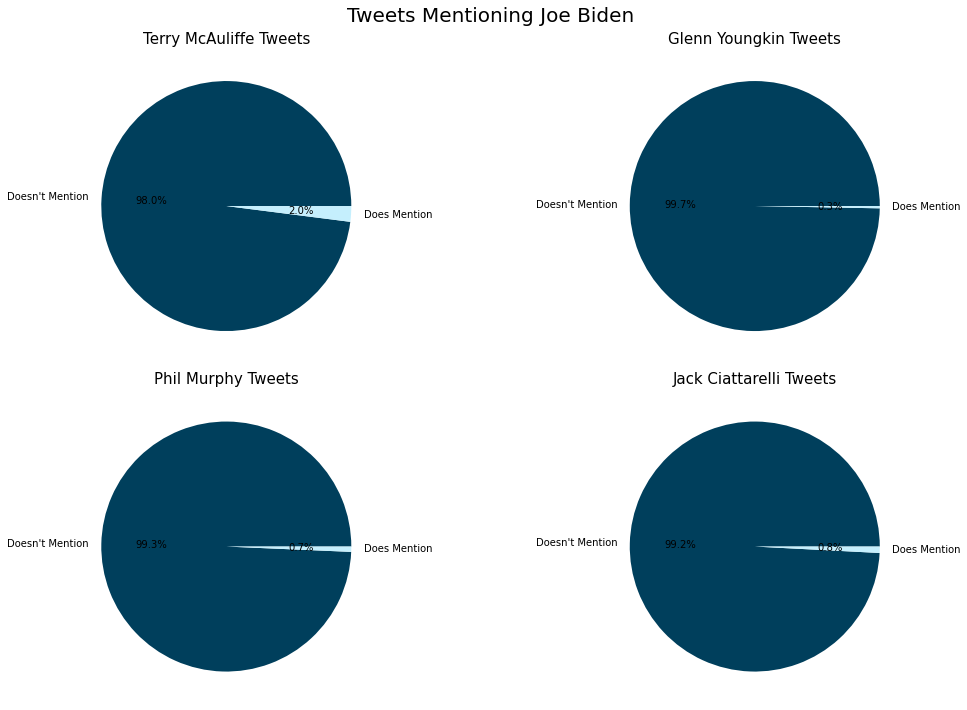

In [18]:
plot_mentions_pie('mentions_biden','Tweets Mentioning Joe Biden')
plt.savefig('mentions_biden.png');

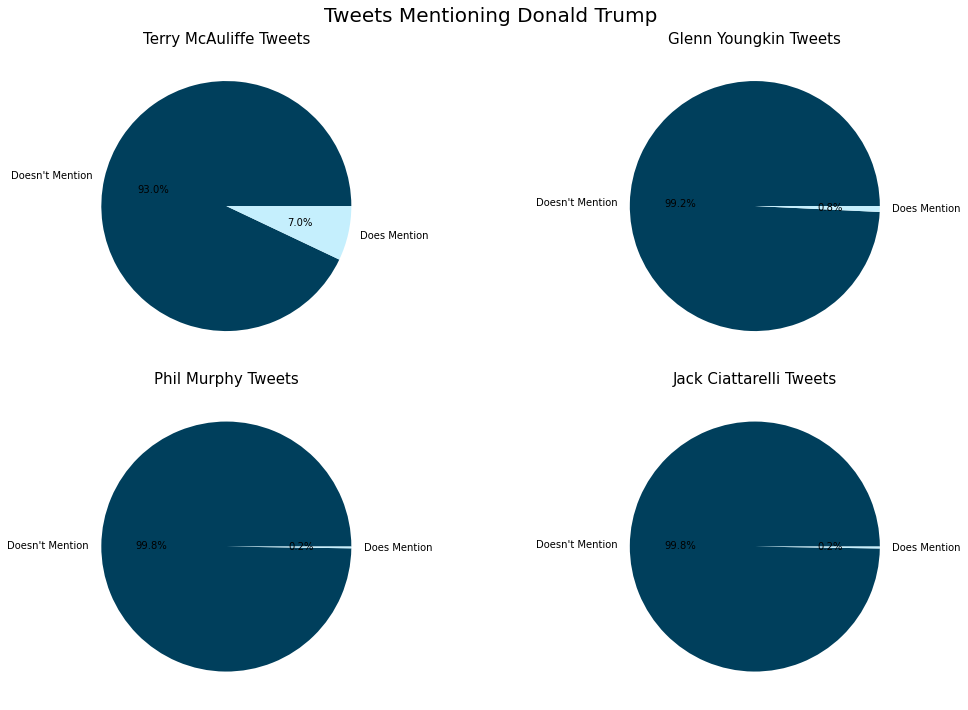

In [19]:
plot_mentions_pie('mentions_trump','Tweets Mentioning Donald Trump')
plt.savefig('mentions_trump.png');

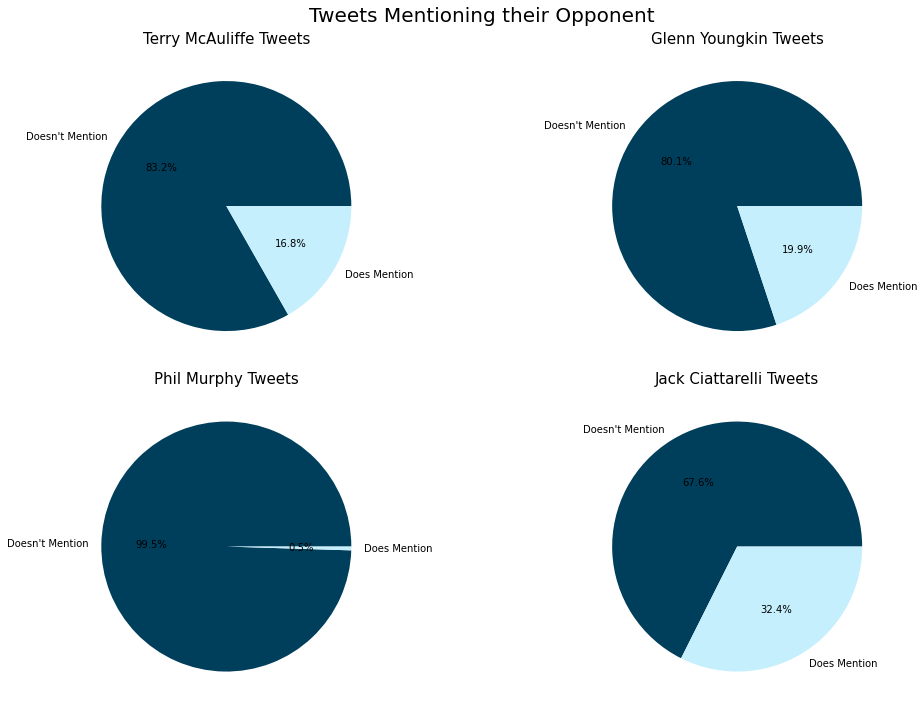

In [20]:
plot_mentions_pie('mentions_opponent','Tweets Mentioning their Opponent')
plt.savefig('mentions_opponent.png');

In [21]:
def plot_mentions_bar(mentioned, title):
    fig, axes = plt.subplots(2,2, sharey = True, figsize = (15,12))
    fig.suptitle(title, fontsize = 20)

    sns.countplot(ax = axes[0,0], x = mentioned, data = mcauliffe_tweets, palette = ['#003f5c','#c5effd'])
    axes[0,0].set_title('Terry McAuliffe Tweets', fontsize = 15)
    axes[0,0].set_xticklabels(["Doesn't mention","Does Mention"], fontsize = 12)

    sns.countplot(ax = axes[0,1], x = mentioned, data = youngkin_tweets, palette = ['#003f5c','#c5effd'])
    axes[0,1].set_title('Glenn Youngkin Tweets', fontsize = 15)
    axes[0,1].set_xticklabels(["Doesn't mention","Does Mention"], fontsize = 12)

    sns.countplot(ax = axes[1,0], x = mentioned, data = murphyNJ_tweets, palette = ['#003f5c','#c5effd'])
    axes[1,0].set_title('Phil Murphy Tweets', fontsize = 15)
    axes[1,0].set_xticklabels(["Doesn't mention","Does Mention"], fontsize = 12)

    sns.countplot(ax = axes[1,1], x = mentioned, data = ciattarelliNJ_tweets, palette = ['#003f5c','#c5effd'])
    axes[1,1].set_title('Jack Ciattarelli Tweets', fontsize = 15)
    axes[1,1].set_xticklabels(["Doesn't mention","Does Mention"], fontsize = 12)

    plt.tight_layout(pad = 2.0);

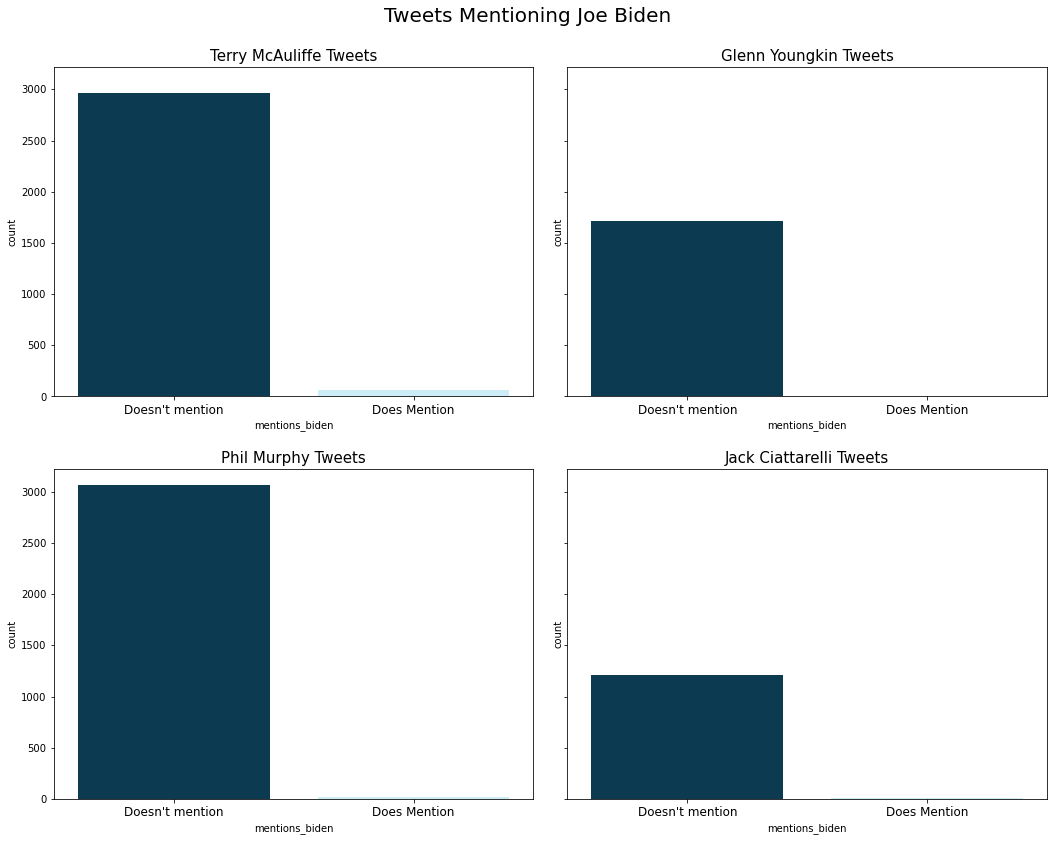

In [22]:
plot_mentions_bar('mentions_biden','Tweets Mentioning Joe Biden')
plt.savefig('mentions_biden_bar.png');

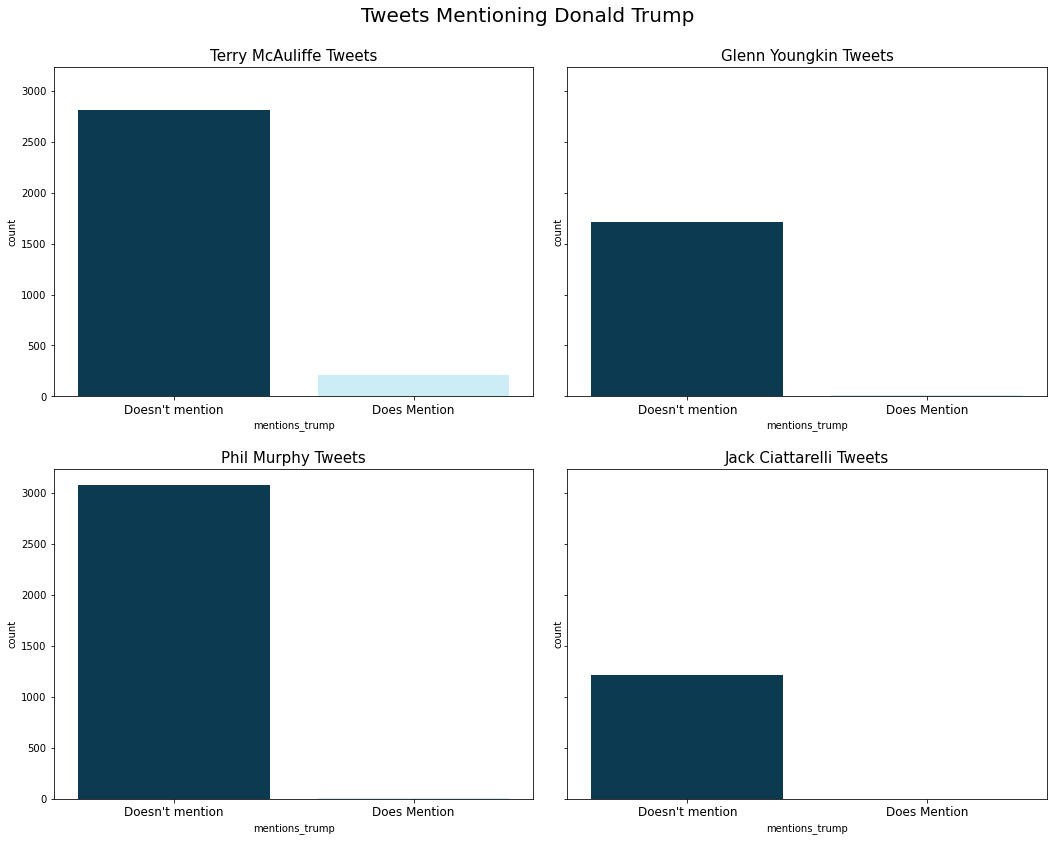

In [23]:
plot_mentions_bar('mentions_trump','Tweets Mentioning Donald Trump')
plt.savefig('mentions_trump_bar.png');

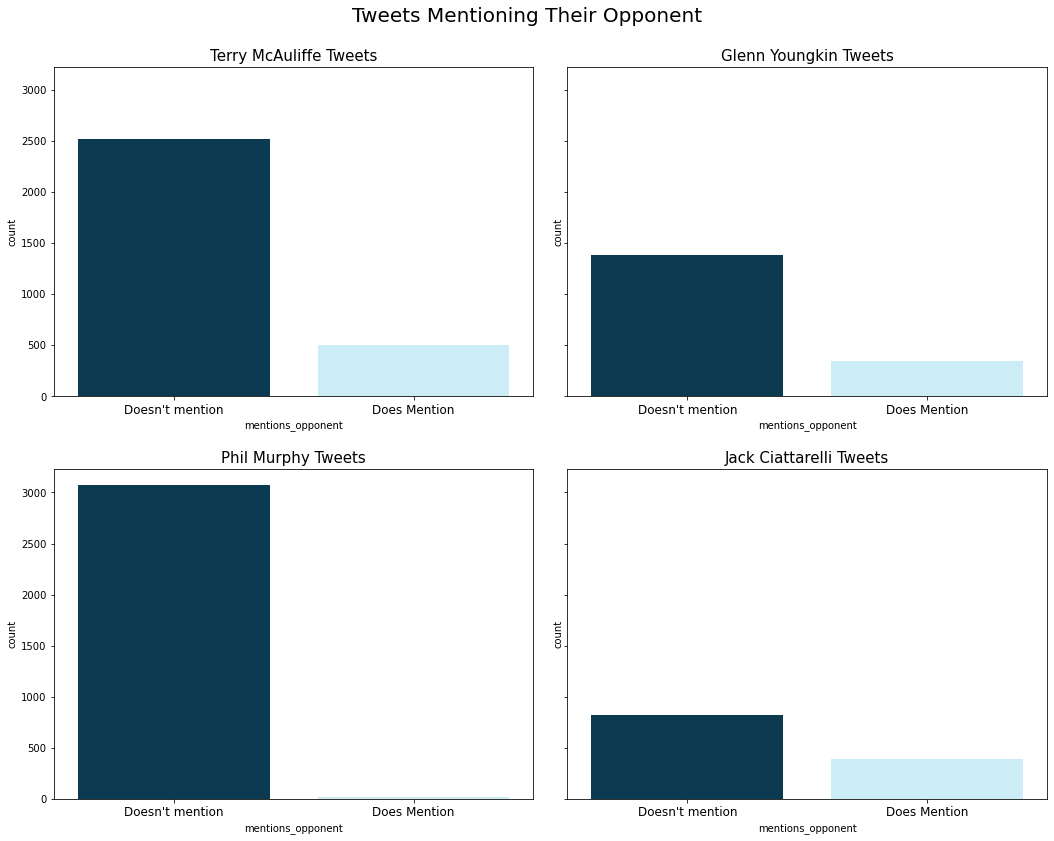

In [24]:
plot_mentions_bar('mentions_opponent','Tweets Mentioning Their Opponent')
plt.savefig('mentions_opponent_bar.png');

In [25]:
mcauliffe_tweets.to_pickle('pickle_files/mcauliffe_tweets_df.pkl')
youngkin_tweets.to_pickle('pickle_files/youngkin_tweets_df.pkl')
murphyNJ_tweets.to_pickle('pickle_files/murphyNJ_tweets_df.pkl')
ciattarelliNJ_tweets.to_pickle('pickle_files/ciattarelliNJ_tweets_df.pkl')

### Assess entire tweet dataset - MVP

In [26]:
all_tweets = pd.concat([mcauliffe_tweets,youngkin_tweets,murphyNJ_tweets,ciattarelliNJ_tweets])

In [27]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9054 entries, 0 to 1218
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 9054 non-null   object             
 1   created_at               9054 non-null   datetime64[ns, UTC]
 2   tweet_text               9054 non-null   object             
 3   num_favorites            9054 non-null   int64              
 4   num_retweets             9054 non-null   int64              
 5   in_reply_to_screen_name  714 non-null    object             
 6   in_reply_to_tweet_id     709 non-null    object             
 7   user_id                  9054 non-null   object             
 8   user_name                9054 non-null   object             
 9   user_handle              9054 non-null   object             
 10  user_location            9054 non-null   object             
 11  user_followers           9054 

In [28]:
corpus = list(all_tweets.tweet_text)
agg_length = sum([len(d.split(' ')) for d in corpus])
print('My dataset currently has {} documents with an total aggregated length of {} terms.'.format(len(corpus), 
                                                                                                  agg_length))


My dataset currently has 9054 documents with an total aggregated length of 253315 terms.
